# How to find p and q order for MA and AR processes?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as ts
from pmdarima import auto_arima

# MA
MA is a running average over the past values of the pas stochastic values.

In [2]:
def MA(rand_e_list, b_list, mean=0):
    """
    Return a time series that follows an MA model of order q=len(theta).
    Args:
        rand_e_list: list of random variables that represents residuals/erros. 
        b_list: list of the weights/coefficients of this model
        mean: time serie offset
    """
    b_list = list(b_list)
    N = len(rand_e_list) # 
    b_with_inter = np.array([1] + b_list)
    b_with_inter = b_with_inter[::-1] # invert order to have (a{N-1}, a{N-2}, a{N-q}, a0)
    q = len(b_with_inter)
    # store all the values of the time series
    X = []
    # MA time series is the sum of the q last obs of stochastic variable E multiplied by the coefficients b_i
    for i in range(N-q):
        X.append(np.dot(b_with_inter, rand_e_list[i:i+q])+mean)
    return np.array(X)

In [3]:
# generate 500 set of points
N = 500
b_coeff = []
X_MA = []
q_max = 8  
weight = 1
# N fixed stochastic variable as white noise series
rand_e_list = np.random.normal(size=N)

# Generate MA wih variable 
for q in range(1, q_max+1, 2):
    print(f'>> Create MA time series of order {q}')
    b_coeff.append(weight*np.random.random(q))
    # use a new set of growing theta 
    X_MA.append(MA(rand_e_list, b_coeff[-1]))

>> Create MA time series of order 1
>> Create MA time series of order 3
>> Create MA time series of order 5
>> Create MA time series of order 7


As the number of lagged variables (of a_coeff) increases, we can see longer local trends. 

4 8


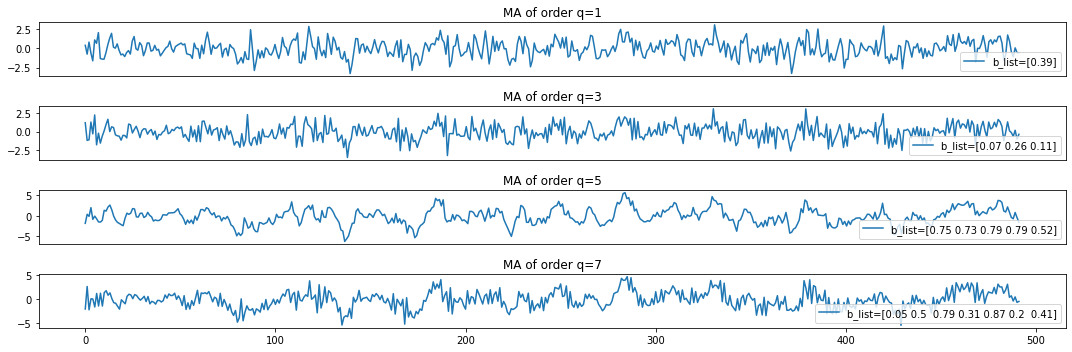

In [5]:
fig, ax = plt.subplots(4,1, figsize=(15,5))
print(len(b_coeff), q_max)

for i in range(q_max//2):
    ax[i].plot(X_MA[i], label=f'b_list={str(b_coeff[i].round(2))}')
    ax[i].legend(f'b_list={str(b_coeff[i])}')
    ax[i].get_xaxis().set_visible(False)
    ax[i].legend()
    ax[i].set_title(f'MA of order q={(i*2)+1}')
ax[-1].get_xaxis().set_visible(True)
fig.tight_layout()


In [6]:
def arimamodel(timeseriesarray, exogenous=None):
    autoarima_model = auto_arima(timeseriesarray, 
                              start_p=0, # auto-regressive (AR)
                              start_q=0, # moving average
                              test="adf", # ADF Augmented Dickey-Fuller test.
                              trace=True,
                            seasonal=True,
                            d= None, max_d=4, max_p=4,
                                     exogenous=exogenous
)
    return autoarima_model

for i in range(q_max//2):
    print(f'q={2*i+1}')
    arima_model = arimamodel(X_MA[i])
    parameter = arima_model.get_params().get('order')
    print(f'Optimal order for is: {parameter} \n')


q=1
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1486.704, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1437.846, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1434.586, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1486.069, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1436.219, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1436.199, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1438.189, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1433.439, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1435.025, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1435.006, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1436.565, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1437.000, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.599 seconds
Optimal order for is: (0, 0, 1) 

q=3
Performing stepwise search to minimize aic
 AR

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


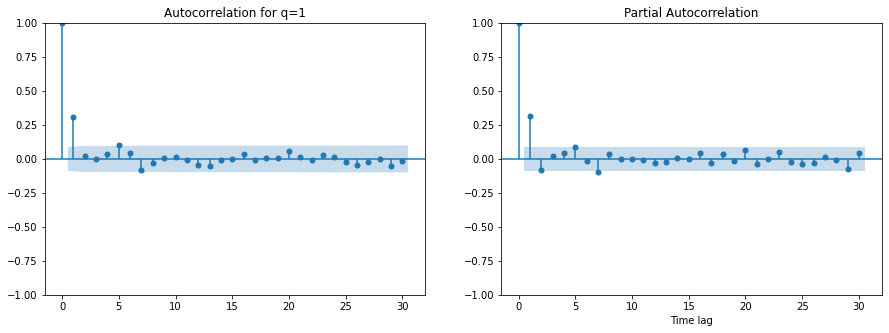

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


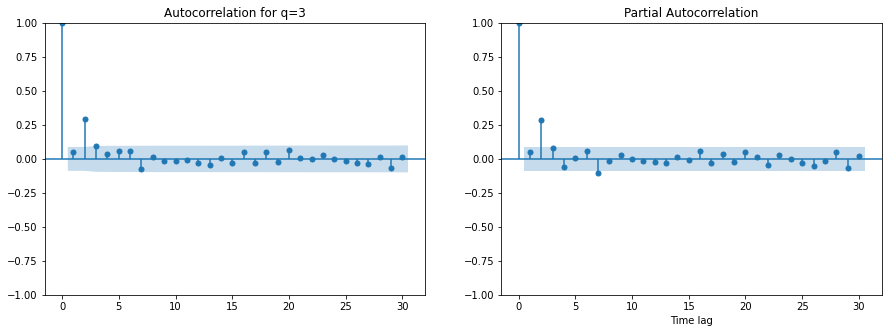

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


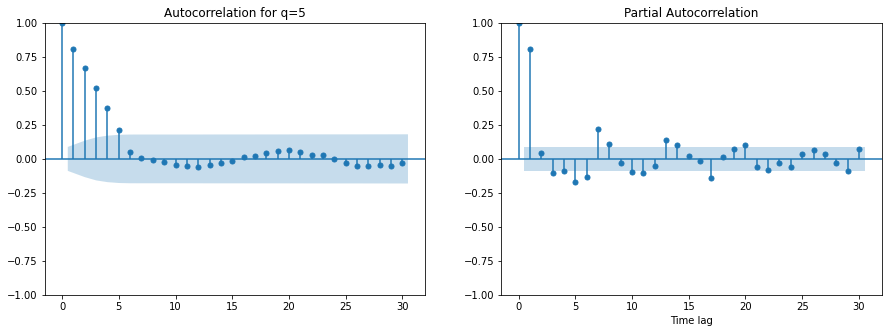

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


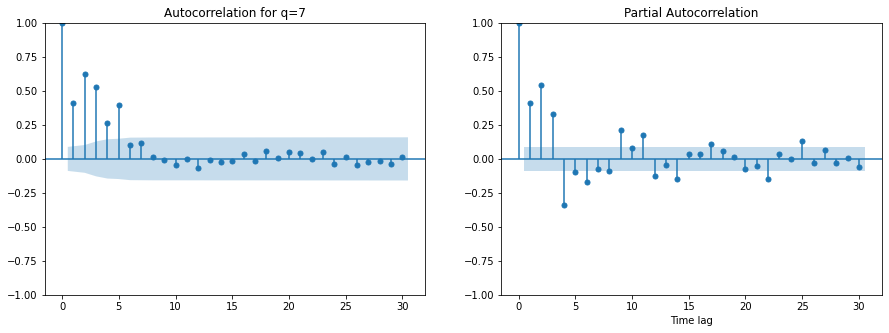

In [10]:
for i in range(0, q_max//2):
    #Analysis of ACF and PACF  
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    fig = sm.graphics.tsa.plot_acf(X_MA[i], lags=30, ax=axes[0], )
    fig = sm.graphics.tsa.plot_pacf(X_MA[i], lags=30, ax=axes[1])
    axes[0].set_title(f'Autocorrelation for q={(2*i)+1}')
    plt.xlabel('Time lag')
    plt.show()

# Autoregressive Model (AR)

Contrary to MA we use the actual position of the time series instead of the raw stochastic values.
AR is a running average over the past values of the time series.

In [11]:
def AR(rand_v_list: list[float], a: list[float], mean: float=0) -> list:
    """
    Return a time series that follows an AR model of order p=len(a_with_inter).
    Args:
        rand_v_list: list of random variable
        a: list of coefficients
        mean: mean of the time series
    """
    a = list(a)
    N = len(rand_v_list) # how many steps we have
    a_with_inter = np.array([1] + a) # add t-1 values with no coefficient
    a_with_inter = a_with_inter[::-1] # invert order
    p = len(a_with_inter) # how many significant lags we have
    # store all the values of the time series
    X = rand_v_list.copy()
    # multiplies coeff of a_with_inter with running values of lagged position of the time serie X 
    # that were previously filled
    for i in range(p, N):
        X[i-1] = np.dot(X[i-p:i], a_with_inter) + mean
    return np.array(X)

In [12]:
# generate 500 set of points
N = 500
a_list = []
X_AR = []
p_max = 8 
weight = 0.1

# N fixed stochastic variables
rand_v_list = np.random.normal(size=N)

# Generate MA wih variable p value {1,3,5,7}
for p in range(1, p_max+1, 2):
    a_list.append(weight*np.random.random(p) -0.5) # we simulate a coefficient for each lagged value
    # use a new set of growing theta 
    X_AR.append(AR(rand_v_list, a_list[-1]))

As we increase p, we also increase the oscillotary nature of the time serie. when the time serie is growing too much, there is this 
natural trend from the auto regressive component of bringing it back down its average value. 
Now it is oscillation round 0 but could be any value. 

4 8


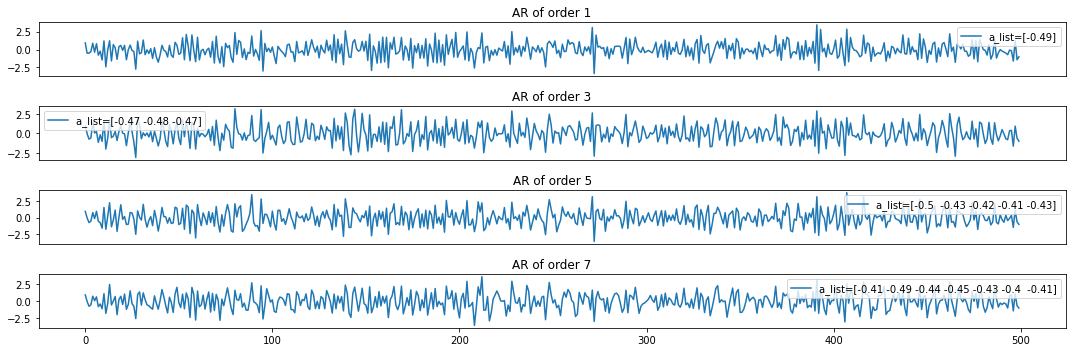

In [13]:
fig, ax = plt.subplots(4,1, figsize=(15,5))
print(len(a_list), p_max)

for i in range(p_max//2):
    ax[i].plot(X_AR[i], label=f'a_list={str(a_list[i].round(2))}')
    ax[i].legend(f'a_list={str(a_list[i])}')
    ax[i].get_xaxis().set_visible(False)
    ax[i].legend()
    ax[i].set_title(f'AR of order {(i*2)+1}')

ax[-1].get_xaxis().set_visible(True)
fig.tight_layout()

In PACF we can read the number of significants lags as the value of p. 

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


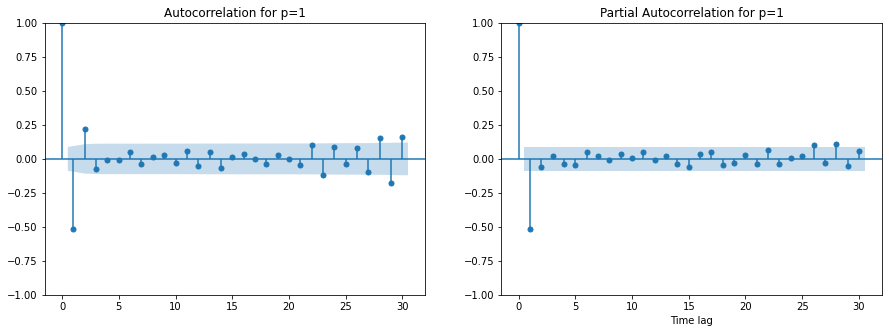

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


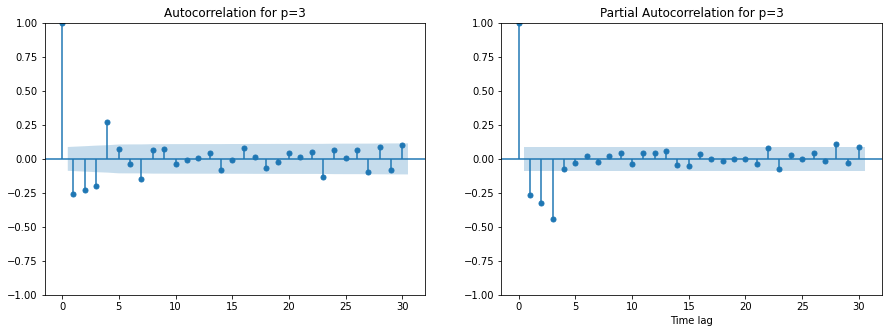

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


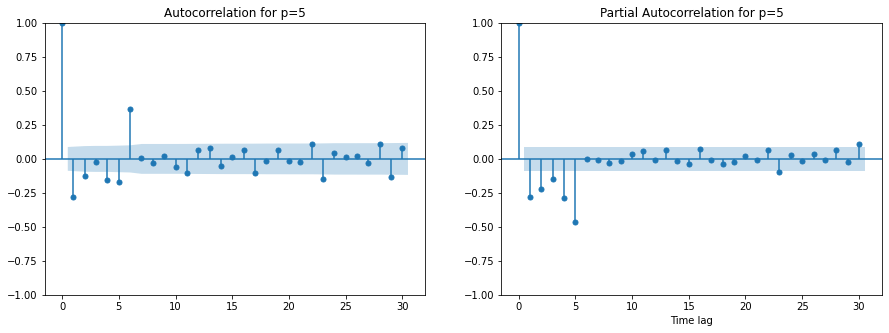

/Users/10972/Documents/greenphard/wind_forecast/env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


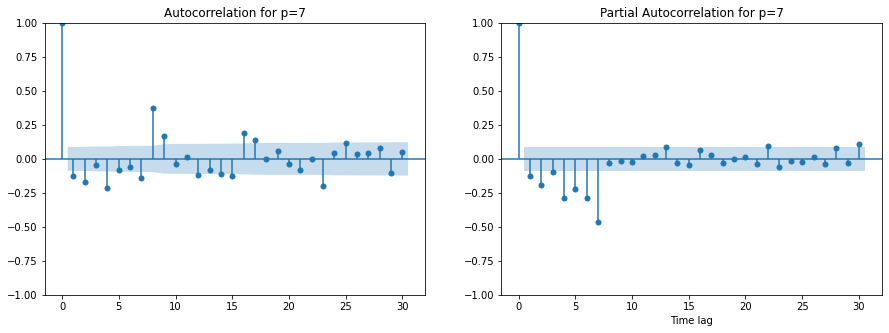

In [14]:
for i in range(0, p_max//2):
    #Analysis of ACF and PACF  
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    fig = sm.graphics.tsa.plot_acf(X_AR[i], lags=30, ax=axes[0])
    fig = sm.graphics.tsa.plot_pacf(X_AR[i], lags=30, ax=axes[1])
    axes[0].set_title(f'Autocorrelation for p={(2*i)+1}')
    axes[1].set_title(f'Partial Autocorrelation for p={(2*i)+1}')
    plt.xlabel('Time lag')
    plt.show()